<a href="https://colab.research.google.com/github/kaddef/Function-Approximation/blob/main/Function_Approximation_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
def y(x):
    return (np.sin(2*np.pi*x) + np.sin(5*np.pi*x))
    #return (np.power(x,2))
    #return (x+10)

In [38]:
#x_vals = np.arange(-10,10,0.2)
x_vals = np.arange(-1,1,0.005)
y_vals = y(x_vals)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)
x_train = tf.constant(x_train)
y_train = tf.constant(y_train)
x_test = tf.constant(x_test)
y_test = tf.constant(y_test)

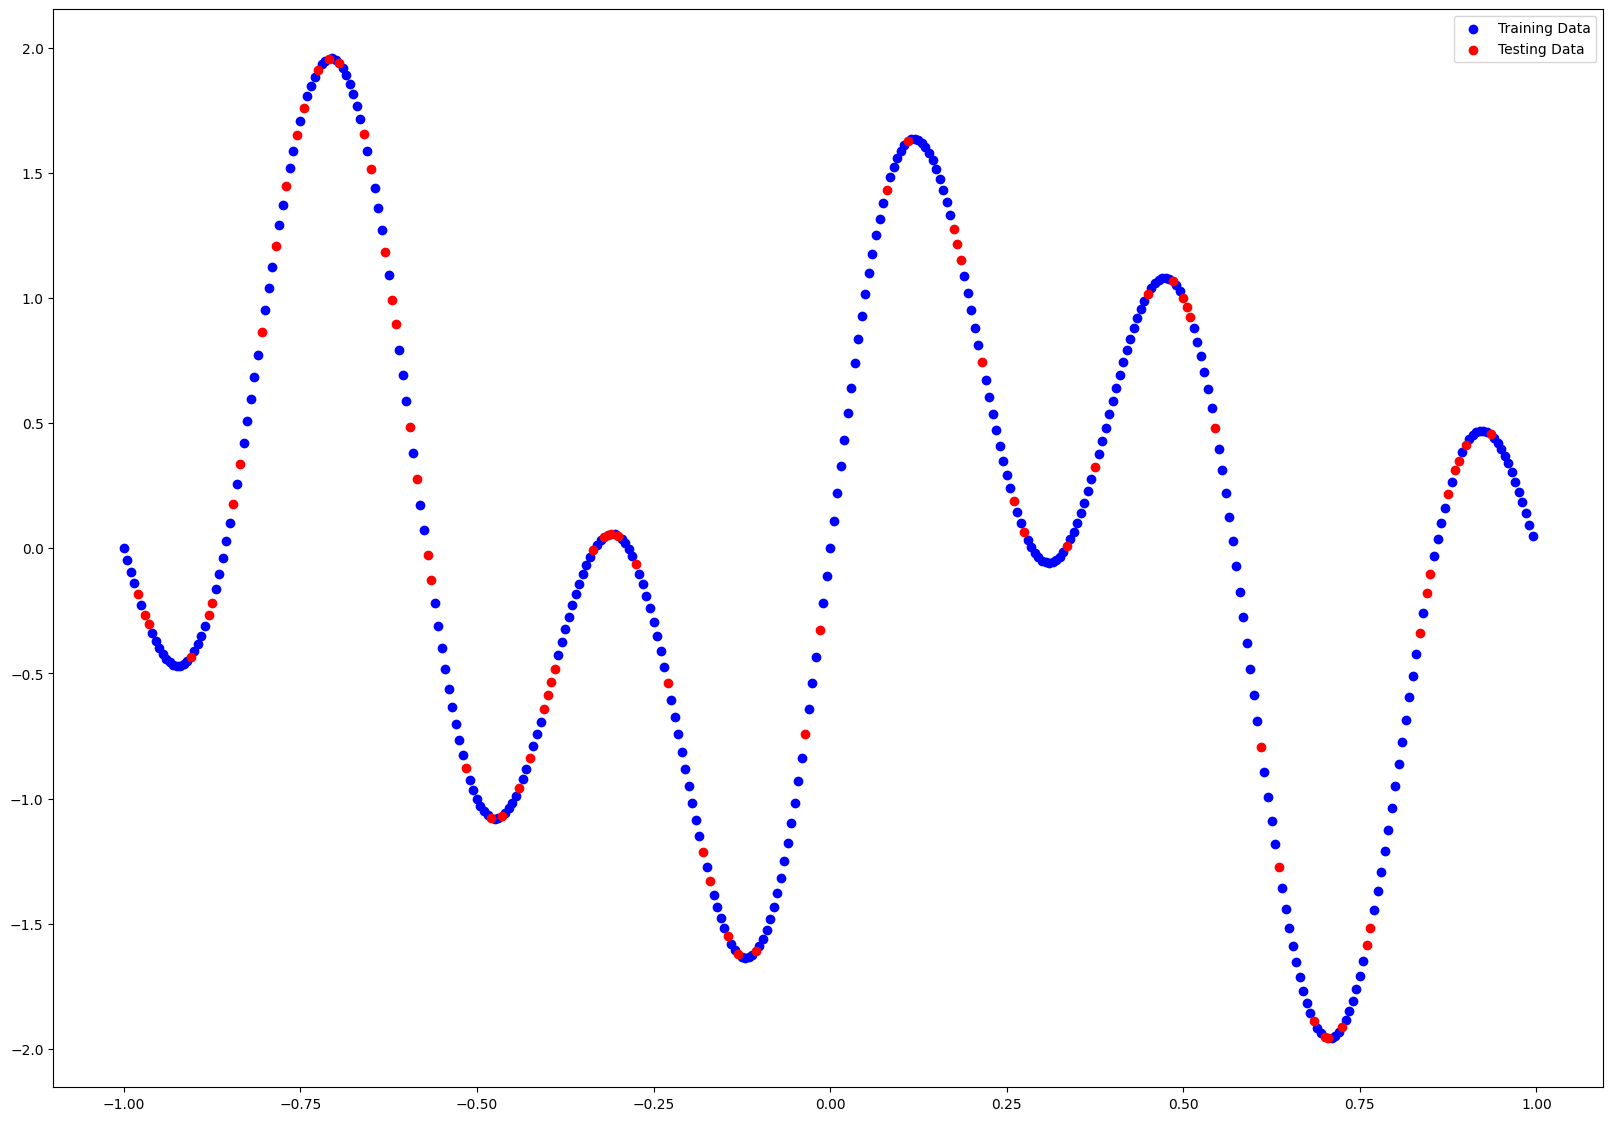

In [40]:
plt.figure(figsize=(20,14))
plt.scatter(x_train, y_train, c="b", label = "Training Data")
plt.scatter(x_test, y_test, c="r", label = "Testing Data")
plt.legend();

In [48]:
from keras.api._v2.keras import activations
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1], activation=activations.sigmoid, name = "input_layer"),
    tf.keras.layers.Dense(20, activation=activations.sigmoid),
    tf.keras.layers.Dense(20, activation=activations.sigmoid),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "My_first_model")

model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)
#model.summary()
history = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=800, verbose=0)

model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.2756 - mae: 0.2756


[0.27564147114753723, 0.27564147114753723]

3/3 [==============================] - 0s 5ms/step - loss: 0.0539 - mae: 0.0539


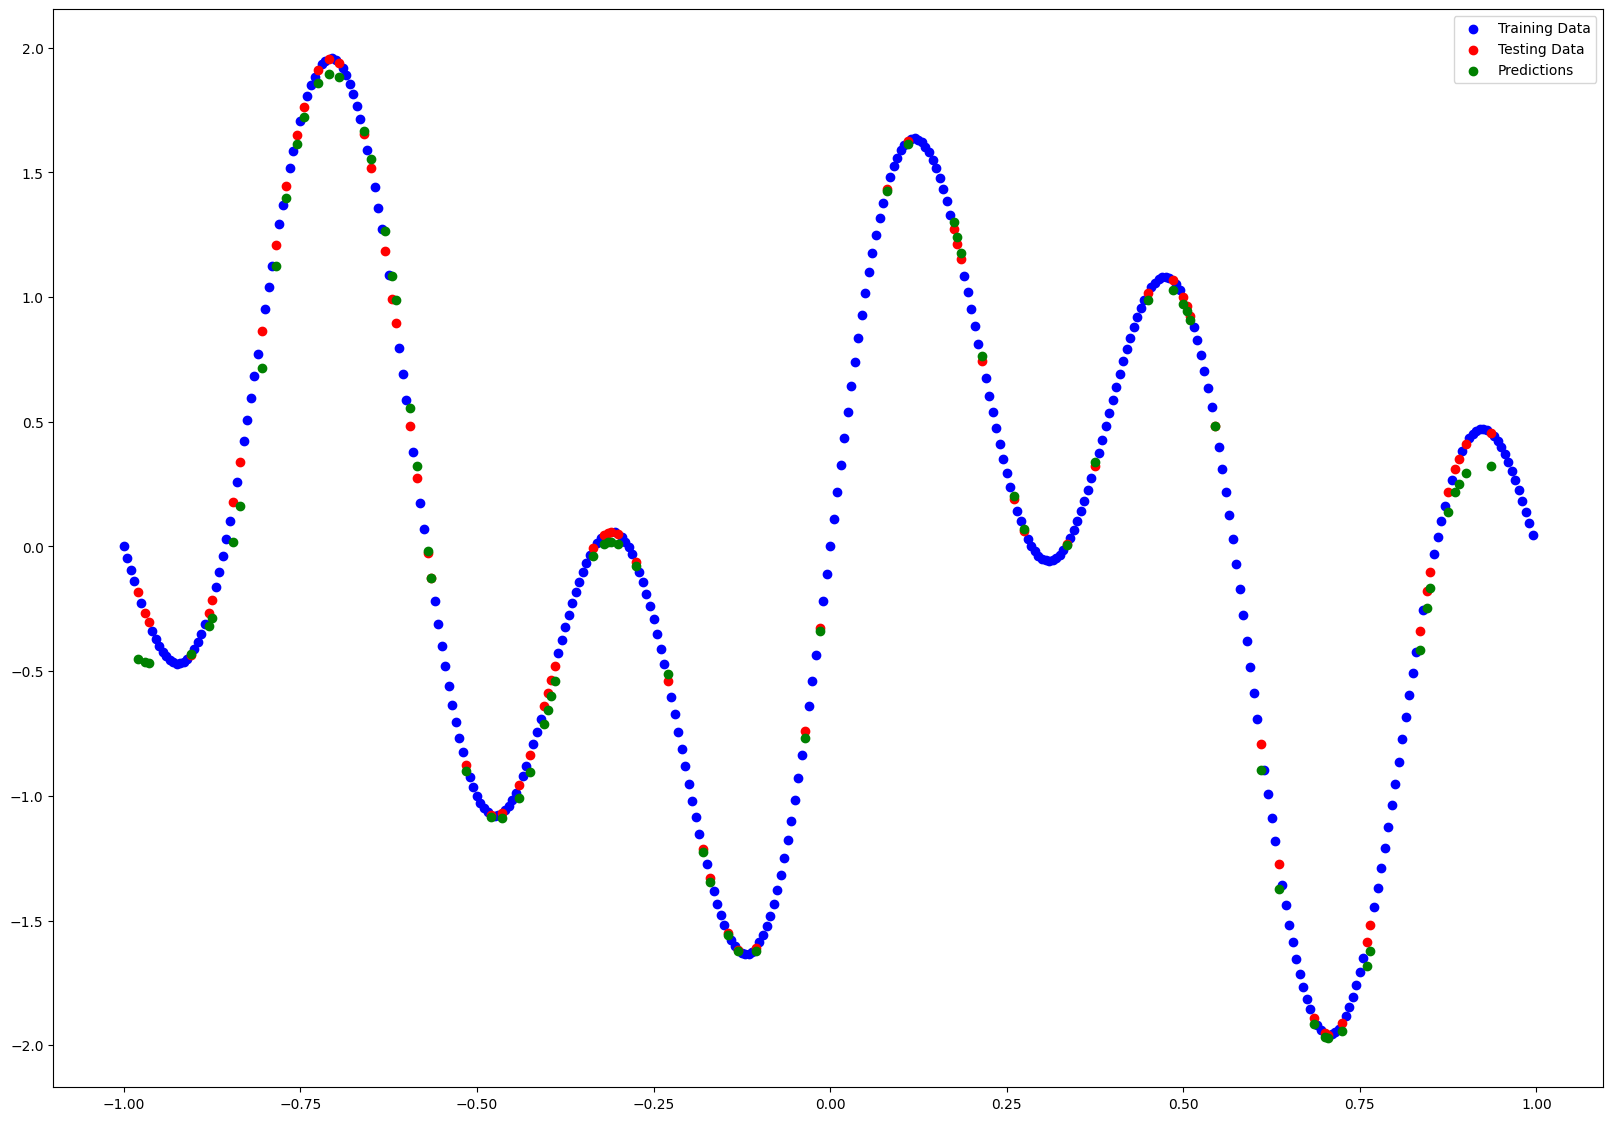

In [46]:
y_pred = model.predict(x_test)

plt.figure(figsize=(20,14))
plt.scatter(x_train, y_train, c = "b", label = "Training Data")
plt.scatter(x_test, y_test, c = "r", label = "Testing Data")
plt.scatter(x_test, y_pred, c = "g", label = "Predictions")
plt.legend();

Text(0.5, 0, 'epochs')

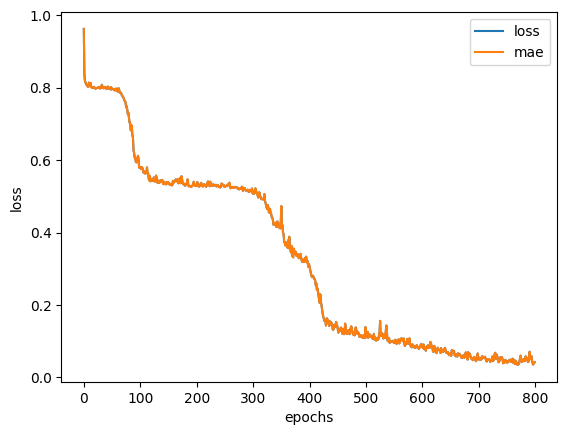

In [47]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")